In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [3]:
df = pd.read_excel('Данные_Модели.xlsx')

In [4]:
df

,Плотность населения,Соотношения родившихся к умершим,0-4(к обшему населению),5-9(к обшему населению),10-14(к обшему населению),15-19(к обшему населению),20-24(к обшему населению),25-29(к обшему населению),30-34(к обшему населению),35-39(к обшему населению),...,60-64(к обшему населению),65-69(к обшему населению),70-74(к обшему населению),75-79(к обшему населению),80-84(к обшему населению),85-89(к обшему населению),90-94(к обшему населению),95-99(к обшему населению),100 лет и старше(к обшему населению),Уровень преступности
0,8.569161,0.671712,0.058461,0.063438,0.054845,0.048800,0.046943,0.064241,0.086087,0.081795,...,0.068868,0.056824,0.037844,0.021347,0.024260,0.009384,0.004072,0.000797,0.000156,0.013930
1,60.648348,0.599640,0.053197,0.055023,0.047391,0.043518,0.042485,0.059875,0.086336,0.084667,...,0.071787,0.059112,0.042324,0.024591,0.027767,0.011402,0.005186,0.001171,0.000265,0.011705
2,57.164244,0.511419,0.050193,0.057251,0.052066,0.045130,0.044795,0.064267,0.084246,0.079564,...,0.075497,0.061769,0.039861,0.024424,0.027452,0.009109,0.004357,0.000771,0.000113,0.009257
3,34.168797,0.472057,0.049215,0.056507,0.054712,0.045172,0.044222,0.062276,0.081023,0.076401,...,0.076603,0.061361,0.038847,0.024539,0.027427,0.011555,0.005385,0.000823,0.000073,0.012728
4,46.680962,0.408104,0.049759,0.055889,0.050810,0.046639,0.043390,0.057370,0.079662,0.078126,...,0.077531,0.065364,0.044638,0.025596,0.029043,0.011419,0.004747,0.000704,0.000122,0.012788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2.183045,0.613690,0.059344,0.068923,0.062376,0.058044,0.054350,0.063574,0.082609,0.082838,...,0.064657,0.056978,0.034736,0.018480,0.017671,0.005477,0.002038,0.000340,0.000038,0.023318
92,0.303025,0.748999,0.054399,0.062712,0.058431,0.052294,0.044331,0.056640,0.083104,0.090361,...,0.069726,0.056804,0.032023,0.013971,0.010289,0.002547,0.001085,0.000307,0.000043,0.018901
93,5.605706,0.835052,0.065593,0.063372,0.057613,0.051778,0.050127,0.057619,0.083683,0.083997,...,0.067413,0.062303,0.036331,0.016487,0.014662,0.005157,0.001696,0.000281,0.000039,0.018408
94,4.361019,0.649361,0.060725,0.068753,0.066789,0.056334,0.051641,0.064281,0.083175,0.080591,...,0.062354,0.058684,0.036209,0.019121,0.016904,0.005584,0.002249,0.000436,0.000101,0.023328


In [5]:
X, y = df.drop(columns='Уровень преступности'), df['Уровень преступности']

In [6]:
scaler = preprocessing.MinMaxScaler()
names = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=names)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

In [8]:
ridge = Ridge(random_state=42)
model = ridge.fit(X_train, y_train)

In [9]:
y_predicat = model.predict(X_test)

In [10]:
answer1 = mean_squared_error(y_test, y_predicat)

In [11]:
answer1

7.534461463395519e-06

In [12]:
y_predicat

array([0.01651614, 0.01702825, 0.01568502, 0.01783344, 0.01397017,
       0.01580727, 0.01513756, 0.01039312, 0.0140068 , 0.01436288,
       0.01288857, 0.01524251, 0.01522272, 0.01490059, 0.01393591,
       0.0158397 , 0.01409021, 0.01720386, 0.0112785 , 0.01550147])

In [13]:
y_test

80    0.019463
77    0.016844
73    0.017591
94    0.023328
33    0.013530
79    0.017637
69    0.012526
42    0.007505
0     0.013930
10    0.011615
64    0.010346
30    0.018974
18    0.012836
4     0.012788
31    0.014424
26    0.014920
12    0.011663
22    0.020968
53    0.010451
85    0.020933
Name: Уровень преступности, dtype: float64

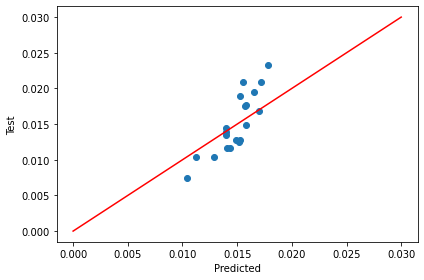

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(y_predicat, y_test)
plt.xlabel('Predicted')
plt.ylabel('Test')

plt.plot([0, 0.03], [0, 0.03], color="red")
plt.tight_layout()